<a href="https://www.kaggle.com/code/arunrowan/machine-learning?scriptVersionId=133080313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Decision Tree**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import graphviz

# Load the dataset from CSV
data = pd.read_csv('/kaggle/input/mlproj/breast-cancer.csv')

# Extract the features (first 31 columns) and the target variable (32nd column)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode the target variable values (B, M) as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Build the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

# Create a graph from the decision tree
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)

# Generate the graph visualization
graph = graphviz.Source(dot_data, format='png')

# Save the visualization as a PNG file
graph.render('decision_tree')

# Predict the diagnosis based on the 6th row
row_6 = X.iloc[5:6, :]  # Assuming row indexing starts from 0
predicted_diagnosis = label_encoder.inverse_transform(classifier.predict(row_6))

# Predict the ID based on the 7th row
row_7 = X.iloc[6:7, :]
predicted_id = row_7.iloc[:, 0].values[0]

print("Predicted Diagnosis:", predicted_diagnosis)
print("Predicted ID:", predicted_id)


Predicted Diagnosis: ['M']
Predicted ID: 844359


# **K Nearest Neighbour**

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset from CSV
data = pd.read_csv('/kaggle/input/mlproj/breast-cancer.csv')

# Extract the features (first 31 columns) and the target variable (32nd column)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode the target variable values (B, M) as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Build the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Predict the diagnosis based on the 6th row
row_6 = X.iloc[5:6, :]  # Assuming row indexing starts from 0
predicted_diagnosis = label_encoder.inverse_transform(knn.predict(row_6))

# Predict the ID based on the 7th row
row_7 = X.iloc[6:7, :]
predicted_id = row_7.iloc[:, 0].values[0]

print("Predicted Diagnosis:", predicted_diagnosis)
print("Predicted ID:", predicted_id)


Predicted Diagnosis: ['M']
Predicted ID: 844359


# **Naive Bayes Classifier**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset from CSV
data = pd.read_csv('/kaggle/input/mlproj/breast-cancer.csv')

# Extract the features (first 30 columns) and the target variable (31st column)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode the target variable values (B, M) as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the diagnosis based on the 6th row
row_6 = X.iloc[5:6, :]  # Assuming row indexing starts from 0
predicted_diagnosis = label_encoder.inverse_transform(classifier.predict(row_6))

# Predict the ID based on the 7th row
row_7 = X.iloc[6:7, :]
predicted_id = row_7.iloc[:, 0].values[0]

print("Predicted Diagnosis:", predicted_diagnosis)
print("Predicted ID:", predicted_id)


Accuracy: 0.6140350877192983
Predicted Diagnosis: ['B']
Predicted ID: 844359


# **Linear Regression**

Predicted diagnosis: M


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


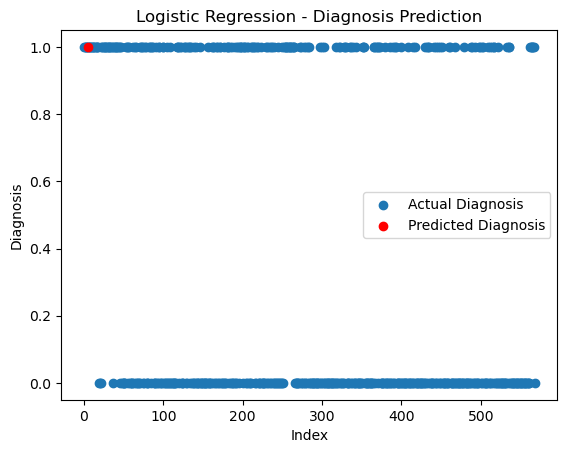

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/kaggle/input/mlproj/breast-cancer.csv')

# Select the features (independent variables) for logistic regression
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
            'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
            'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
            'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
            'symmetry_worst', 'fractal_dimension_worst']

# Select the target variable (dependent variable)
target = 'diagnosis'

# Encode the target variable
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

# Create the logistic regression model
model = LogisticRegression()

# Fit the model using the selected features and target variable
model.fit(data[features], data[target])

# Make a prediction using the 6th row as input
input_data = data.loc[5, features].values.reshape(1, -1)  # Reshape as a 2D array
prediction = model.predict(input_data)

# Decode the predicted diagnosis
predicted_diagnosis = label_encoder.inverse_transform(prediction.astype(int))

# Print the predicted diagnosis
print("Predicted diagnosis:", predicted_diagnosis[0])

# Visualize the predicted diagnosis compared to the actual diagnosis
plt.scatter(data.index, data[target], label='Actual Diagnosis')
plt.scatter(5, prediction, color='red', label='Predicted Diagnosis')
plt.xlabel('Index')
plt.ylabel('Diagnosis')
plt.legend()
plt.title('Logistic Regression - Diagnosis Prediction')
plt.show()


# **K-Means Clustering**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


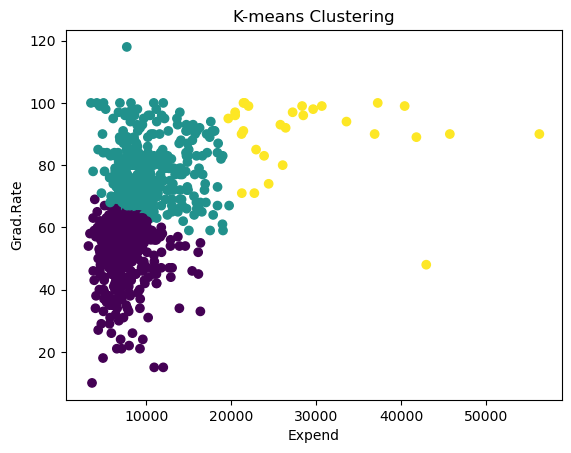

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/kaggle/input/projml1/College1.csv')

# Select the features for clustering and visualization
features = ['Expend', 'Grad.Rate']

# Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(data_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(data['Expend'], data['Grad.Rate'], c=data['Cluster'])
plt.xlabel('Expend')
plt.ylabel('Grad.Rate')
plt.title('K-means Clustering')
plt.show()


# **Hierarchical Clustering**

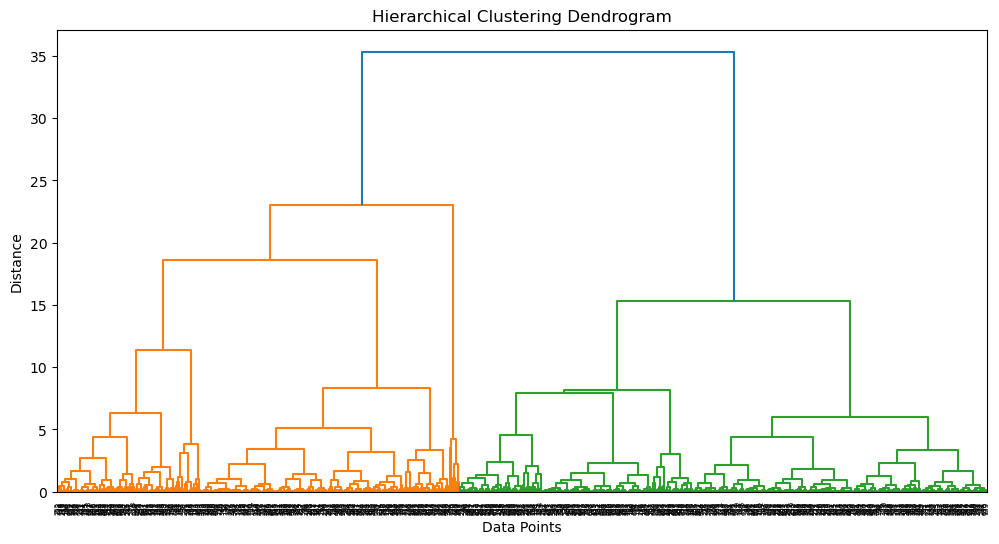

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('/kaggle/input/projml1/College1.csv')

# Select the features for clustering and visualization
features = ['Expend', 'Grad.Rate']

# Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
